## Train Basic Neural Network

a fun exercise to see how well you understand my AI Simplified Playlist:
<br>
https://youtube.com/playlist?list=PLqXS1b2lRpYTpUIEu3oxfhhTuBXmMPppA
<br>
<br>
The entire code below is explained step by step, command by command, in this tutorial of mine: 
<br>
https://youtu.be/xpPX3fBM9dU
<br>
<br>
by: Mariya Sha

### STEP 1: Generate Data

In [58]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler

### STEP 2: Train Model

In [59]:
def get_weighted_sum(feature, weights, bias):
    return np.dot(feature, weights) + bias

def sigmoid(w_sum):
    return 1/(1+np.exp(-w_sum))

def cross_entropy(target, prediction):
    return -(target*np.log10(prediction) + (1-target)*np.log10(1-prediction))

def update_weights(weights, l_rate, target, prediction, feature):
    new_weights = []
    for x, w in zip(feature, weights):
        new_w = w + l_rate*(target-prediction)*x
        new_weights.append(new_w)
    return new_weights

def update_bias(bias, l_rate, target, prediction):
    return bias + l_rate*(target-prediction)

def train_model(data, weights, bias, l_rate, epochs):
    for e in range(epochs):
        individual_loss = []
        for i in range(len(data)):
            feature = data.loc[i][:-1]
            target = data.loc[i][-1]
            w_sum = get_weighted_sum(feature, weights, bias)
            prediction = sigmoid(w_sum)
            loss = cross_entropy(target, prediction)
            individual_loss.append(loss)
            # gradient descent
            weights = update_weights(weights, l_rate, target, prediction, feature)
            bias = update_bias(bias, l_rate, target, prediction)
        average_loss = sum(individual_loss)/len(individual_loss)
        epoch_loss.append(average_loss)
        print("**************************")
        print("epoch", e)
        print(average_loss)

In [60]:
#https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

df = load_breast_cancer()
scaler = MinMaxScaler()
df['data'] = scaler.fit_transform(df['data'])
data = pd.DataFrame(df['data'], columns = df.feature_names)
data['targets'] = pd.DataFrame(df['target'])

In [61]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,targets
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,0
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,0
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,0
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,0
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,0


In [62]:
n_values = len(df.feature_names)

rg = np.random.default_rng()
weights = rg.random((1, n_values))[0]

bias = 0.5
l_rate = 0.1
epochs = 100
epoch_loss = []

train_model(data, weights, bias, l_rate, epochs)

**************************
epoch 0
0.19483677846532682
**************************
epoch 1
0.09930235238033132
**************************
epoch 2
0.08136776093839154
**************************
epoch 3
0.07208087550629681
**************************
epoch 4
0.06606764061566829
**************************
epoch 5
0.06172350954364048
**************************
epoch 6
0.05837738997201143
**************************
epoch 7
0.05569006573311551
**************************
epoch 8
0.05346756186097181
**************************
epoch 9
0.05158895372035731
**************************
epoch 10
0.04997392925635177
**************************
epoch 11
0.048566522432706476
**************************
epoch 12
0.04732624043836104
**************************
epoch 13
0.04622289196181308
**************************
epoch 14
0.04523340707629475
**************************
epoch 15
0.04433979398141185
**************************
epoch 16
0.04352777723361882
**************************
epoch 17
0.04278586166682824
*

### STEP 3: Plot/Visuallize data

<AxesSubplot:>

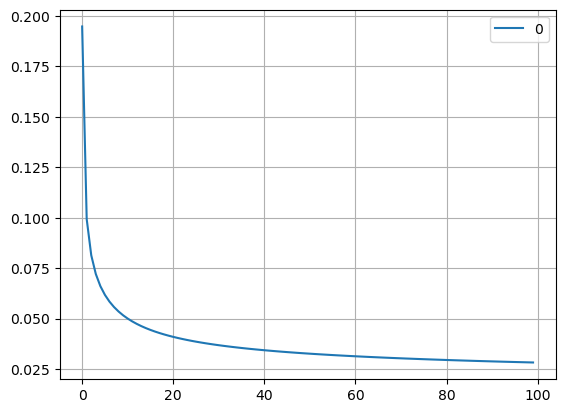

In [63]:
df = pd.DataFrame(epoch_loss)
df_plot = df.plot(kind="line", grid=True)
df_plot